In [1]:
import pandas as pd
import matplotlib

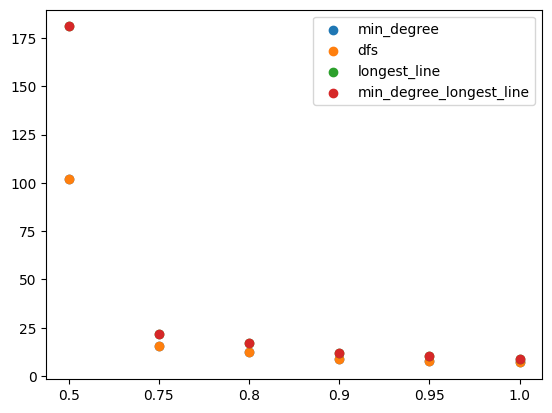

In [31]:
df = pd.read_csv('../First Passage/FP_data.csv')

success_probabilities = ['0.5', '0.75', '0.8', '0.9','0.95','1.0'] #0.1 omitted
for row in range(len(df['max_degree'])):
    first_passage_times = [df[prob][row] for prob in success_probabilities]
    plot = matplotlib.pyplot.scatter(success_probabilities,first_passage_times, label=df['Unnamed: 0'][row])

matplotlib.pyplot.legend()

In [25]:
df

,Unnamed: 0,max_degree,depth,outer_loops,0.1,0.5,0.75,0.8,0.9,0.95,1.0
0,min_degree,3,5,5,1.417566e+07,102.0,15.661637,12.680969,9.057978,7.900865,7.0
1,dfs,4,6,3,1.417566e+07,102.0,15.661637,12.680969,9.057978,7.900865,7.0
2,longest_line,4,6,3,7.600727e+07,181.0,21.721232,17.185379,11.883870,10.249449,9.0
3,min_degree_longest_line,3,5,5,7.600727e+07,181.0,21.721232,17.185379,11.883870,10.249449,9.0
